### Open ai 사용하여 긍정 부정 예측하기

In [1]:
# open ai 연결하기

In [5]:
import openai

In [7]:
from openai import OpenAI
client = OpenAI(api_key = openai_api_key)

In [8]:
def print_streaming_response(response):
    for chunk in response:
        delta = chunk.choices[0].delta
        if delta.content:
            print(delta.content, end="")

In [9]:
messages = [{"role": "user", "content": "안녕하세요"}]
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    stream=True
)
print_streaming_response(response)

안녕하세요! 어떻게 도와드릴까요?

In [48]:
# 프롬프트 역할부여하기

In [148]:
def request_chat_completion(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "당신은 고객 리뷰 전문 분석가입니다."},
            {"role": "user", "content": prompt}
        ],
        stream = False
    )
    return response.choices[0].message.content

In [149]:
request_chat_completion(prompt)

'중립'

In [145]:
print(response.choices[0].message.content)

중립


In [ ]:
def response_edditor(response):
    

In [142]:
def generate_prompt(review):
    prompt = f"""
다음 식당의 리뷰 리스트를 줄거야. 고객의 감정을 문맥을 파악해서 대답해.
대답은 다른 추가적인 설명 없이 '긍정'인 경우 '1', 중립은 '0','부정'은 '-1'로 대답해줘.

---
리뷰: {review}
---
""".strip()
    return prompt

In [123]:
# 테스트

In [143]:
prompt = generate_prompt(
    review= df["review_text"][2]
)

In [147]:
response = request_chat_completion(prompt)

In [177]:
# 100개 테스트 샘플
df_review = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_review_first_preprocessed.csv")

df_review_sample = df_review[1301:]

def reviewloader():
    results = []
    for index, row in df_review_sample.iterrows():
        review = row["review_text"]
        prompt = generate_prompt(review)
        sentiment = request_chat_completion(prompt)
        results.append(sentiment.strip())
    return results

In [178]:
sentiments = reviewloader()

In [179]:
df_review_sample['sentiment'] = sentiments

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_21358/3454683992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sample['sentiment'] = sentiments


In [180]:
df_review_sample.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_review_with_sentiment5.csv", index=False)

### KAKAO 긍정부정분석 전처리

In [61]:
import pandas as pd

df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_reviews_second_preprocessed.csv")

In [62]:
df_A= df.drop(["user_star2"],axis =1)

In [63]:
df_A

,platform,store_name,review_text,user_star,review_date,sentiment
0,kakao_map,홍콩반점0410 가산디지털단지 역점,맛도 서비스도 매우만족임,5,2024-04-14 00:00:00,1
1,kakao_map,홍콩반점0410 대흥역점,방문해서 먹었는데 탕수육이 진짜 맛있네요 부드러우면서 쫄깃했어요,4,2024-08-04 00:00:00,1
2,kakao_map,홍콩반점0410 대흥역점,탕수육 쟁반짜장 고추짬뽕,5,2024-07-29 00:00:00,중립
3,kakao_map,홍콩반점0410 대흥역점,"짜장이 묽은 편이에요. 일반 짜장과 고기 짜장, 짬뽕밥 주문했는데 짜장은..흠......",2,2024-07-28 00:00:00,0
4,kakao_map,홍콩반점0410 대흥역점,NaN,5,2024-07-25 00:00:00,중립
...,...,...,...,...,...,...
1688,kakao_map,홍콩반점0410 영등포역점,여긴 주방장도 알바씁니까? 맨정신으로 어떻게 이딴 음식을 내줄수 있는건지 모르겠네 ...,1,2020-01-18,0
1689,kakao_map,홍콩반점0410 영등포역점,홍콩반점 좋아하는데 여러지점중 제일 별로였어요 면은 불었고 짜장은 산도가 있는맛 3...,2,2019-09-26,0
1690,kakao_map,홍콩반점0410 영등포역점,NaN,5,2019-02-04,중립
1691,kakao_map,홍콩반점0410 영등포역점,서빙하시는 남자분 키는 조금 작지만 귀여운 외모에 완전 친절하심.,5,2019-01-07,1


In [64]:
df_A.loc[:100, 'review_date'] = pd.to_datetime(df_A.loc[:100, 'review_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.date

In [65]:
df_A.loc[(df_A['sentiment']=='긍정'),'sentiment']='1'

In [66]:
df_A.loc[(df_A['sentiment']=='중립'),'sentiment']='0'

In [67]:
df_A.loc[(df_A['sentiment']=='0'),'sentiment']='-1'

In [68]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 5점인 것
df_A.loc[(df_A['sentiment']== '0') & (df_A['review_text'].isna()) & (df_A['user_star']==5),'sentiment']='1'

In [69]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 4점인 것
df_A.loc[(df_A['sentiment']== '0') & (df_A['review_text'].isna()) & (df_A['user_star']>3),'sentiment']='1'

In [70]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 3점 미만인 것
df_A.loc[(df_A['sentiment']=='0')&(df_A['review_text'].isna()) &(df_A['user_star']<3),'sentiment']='0'

In [71]:
# 중립으로 표기되고, 리뷰텍스트가 있는데, 별점이 3점 미만인 것
df_A.loc[(df_A['sentiment']=='0')&(df_A['review_text'].notna()) &(df_A['user_star']<3),'sentiment']='0'

In [72]:
# 긍정으로 표기되고, 별점이 3점 미만인 곳 (비꼬는 리뷰)
df_A.loc[(df_A['sentiment']=='1')&(df_A['user_star']<3),'sentiment']='0'

In [73]:
pd.set_option('display.max_rows', None)

In [74]:
# 중립으로 표시되고 별점이 3점미만인 것 > 부정
df_A.loc[(df_A['sentiment']=='0')&(df_A['user_star']<4),'sentiment']="-1"

In [75]:
df_A.loc[[1648,1580,1557,1538,1491,1488,1484,1417,1411,1397,1183,1165,1127,1100,898], 'sentiment'] = '1'

In [76]:
df_A.loc[[1649,1471,1466,1252,1036,1184,656,372,1655,890,1172,607,385,24], 'sentiment'] = '1'

In [77]:
df_A['review_length'] = df_A['review_text'].str.len()

In [78]:
df_A['review_length'].max()

1658.0

In [79]:
df_A['review_length'].describe()

count    1489.000000
mean       71.749496
std        90.055052
min         1.000000
25%        21.000000
50%        47.000000
75%        89.000000
max      1658.000000
Name: review_length, dtype: float64

In [80]:
df_A = df_A.rename(columns={'sentiment': 'classification_result'})

In [82]:
df_A.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_thired_preprocessed.csv", index=False)

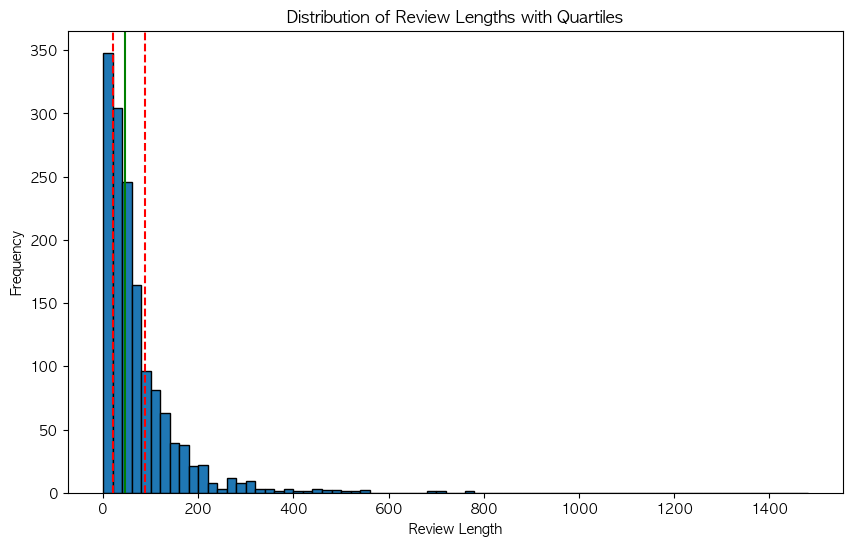

In [50]:
# 리뷰 길이분포
import matplotlib.pyplot as plt
import numpy as np

#사분위 수 계산
q1 = df_A['review_length'].quantile(0.25)
median = df_A['review_length'].median()
q3 = df_A['review_length'].quantile(0.75)


plt.figure(figsize=(10, 6))
plt.hist(df_A['review_length'].dropna(), bins=np.arange(0,1500,20), edgecolor='black')

# 사분위수 선 그리기
plt.axvline(q1, color='red', linestyle='--', linewidth=1.5, label=f'Q1: {q1}')
plt.axvline(median, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median}')
plt.axvline(q3, color='red', linestyle='--', linewidth=1.5, label=f'Q3: {q3}')

plt.title('Distribution of Review Lengths with Quartiles')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()